<a href="https://colab.research.google.com/github/SatishAwal/Machine-Learning-Foundations-Midterm-1/blob/main/MLMidtermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Midterm Project Report: Analysis of Civilian Fatalities in Gaza**



# 1. Dataset Overview
    Source: Tech for Palestine
    File Used: killed_in_gaza.xlsx
    Sheets Analyzed: Sheet1 (fatalities data), Sheet2 (supporting data)

# 2. Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path="/content/killed_in_gaza.xlsx"

#df = pd.read_csv('killed-in-gaza.csv')

# Read a specific sheet by name
df = pd.read_excel(file_path, sheet_name='Sheet1')
df_report = pd.read_excel(file_path, sheet_name='Sheet2')

# Display the first few rows
print(df.head())

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display summary statistics
print(df.describe(include='all'))


          id                                       name  \
0  999783350      Ø±Ø£ÙØª Ø§Ù…ÙŠØ± Ø­Ù…Ø¯Ø§Ù† Ø¹Ø§Ø¨Ø¯   
1  999783079  Ù†Ø§Ù‡Ø¶ Ø­Ù„Ù…ÙŠ ØµØ§Ù„Ø­ Ø§Ù„Ù…ÙŠØ¯Ù†Ù‡   
2  999781917      Ø¹Ù„ÙŠ Ø³ÙŠØ¯ Ø¹Ù„ÙŠ Ø§Ù„Ø´Ø¹Ø±Ø§ÙˆÙŠ   
3  999781826    Ù…Ø­Ù…Ø¯ Ø¹Ø·Ø§ Ø±ÙˆØ¨ÙŠÙ† Ø§Ù„ÙØ±Ø§Ù…   
4  999781396          Ø¥ÙŠØ§Ø¯ Ø±ÙŠØ§Ø¶ Ø­Ø³Ù† Ø­Ø¬Ø§Ø¬   

                        en_name  age date_of_birth  sex source date_of_death  
0        Rafat Amir Hamdan Abed   50    1973-03-23    m      u    2023-03-23  
1   Nahed Hilmi Saleh Al-Meidna   53    1970-11-26    m      u    2023-11-26  
2      Ali Sayed Ali Al-Sharawi   46    1976-11-15    m      u    2022-11-15  
3  Mohammed Ata Rubin Al-Farram   47    1976-12-18  NaN      u    2023-12-18  
4      Iyad Riyad Hassan Hajjaj   47    1976-12-17    m      u    2023-12-17  
Dataset contains 50020 rows and 8 columns.
                  id                                 name  \
count   5.002000e+04                                50020   
unique

### Handling Missing Values
*   Checked for missing values across columns.
*   Missing values were handled as follows:
    *   Age: Filled with the median age.
    *   Date of Birth, Sex, Date of Death: Filled with 'Unknown'.

In [80]:
# Check for missing values
print(df.isnull().sum())

# Fill missing 'age' values with the median age
df['age'].fillna(df['age'].median())

# Fill missing 'dob' values with a placeholder
df['date_of_birth'].fillna('Unknown')

# Fill missing 'sex' values with 'Unknown'
df['sex'].fillna('Unknown')

# Fill missing 'sex' values with 'Unknown'
df['date_of_death'].fillna('Unknown')
print(df.shape)


id                 0
name               0
en_name            0
age                0
date_of_birth      0
sex               10
source             6
date_of_death      0
calculated_age     0
age_group          0
dtype: int64
(50020, 10)


## Exploratory Data Analysis (EDA)


*   Bar plot of fatalities grouped by gender.
*   The dataset includes counts for male, female, and unknown gender fatalities.



###   Gender Distribution of Fatalities

sex
m    33507
f    16503
Name: count, dtype: int64


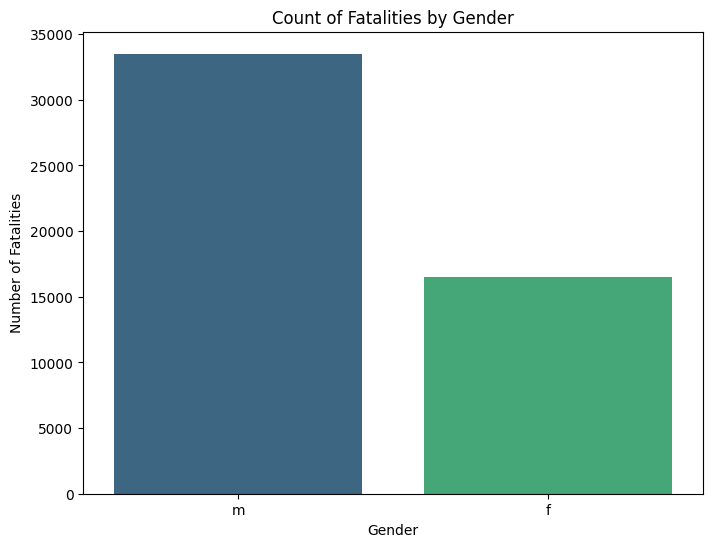

In [94]:
# Count of fatalities by gender
gender_counts = df['sex'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette='viridis', legend=False)
plt.title('Count of Fatalities by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.show()

###  Age Distribution of Fatalities

*   Histogram showing the distribution of fatalities by age.
*   Age divided into 20 equal bins to show frequency.



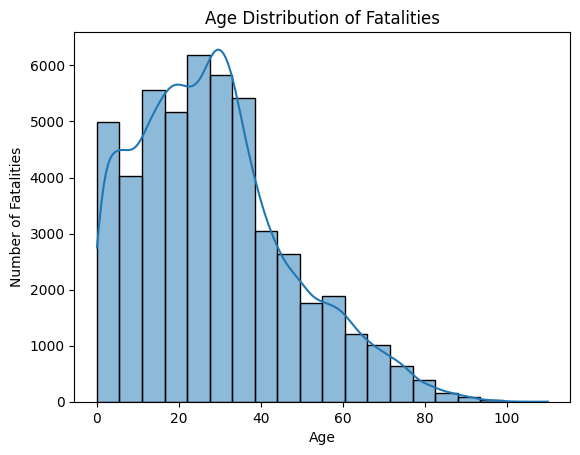

In [110]:

# Histogram of age distribution
sns.histplot(df['age'], bins=20, kde=True)  #age data will be divided into 20 equally spaced intervals.
plt.title('Age Distribution of Fatalities')
plt.xlabel('Age')
plt.ylabel('Number of Fatalities')
plt.show()


### Age Groups and Gender
*   Age groups defined:

    Child: 0–12

    Youth: 13–18

    Adult: 19–40

    Middle Age: 41–60

    Senior: 61+









In [96]:
# Define age bins and labels
bins = [0, 12, 18, 40, 60, 120]
labels = ['Child', 'Youth', 'Adult', 'Middle Age', 'Senior']

# Create an age group column

#pd.cut() function to categorize the age column in a DataFrame into the defined age groups

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#right=False ensures that the rightmost bin edge is excluded from the interval, except for the last bin.

# Group by gender and age group and count fatalities

#groups " DataFrame df" first by the sex column and then by the newly created age_group column.

demographic_counts = df.groupby(['sex', 'age_group'], observed=True).size().unstack(fill_value=0)

#observed=True means only include the categories that appear in the data.
print(demographic_counts)

age_group  Child  Youth  Adult  Middle Age  Senior
sex                                               
f           4640   2074   5740        2564    1485
m           5230   3669  16555        5701    2352


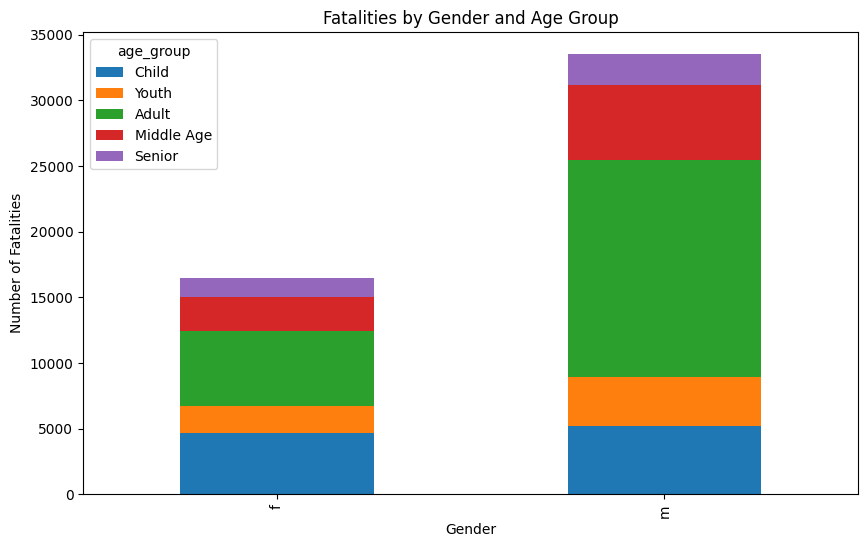

In [97]:
demographic_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Fatalities by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.show()


## Time Series Analysis
Converted date_of_death to a time-series index.

Fatalities were grouped and visualized by month using a line plot with markers to observe trends over time.

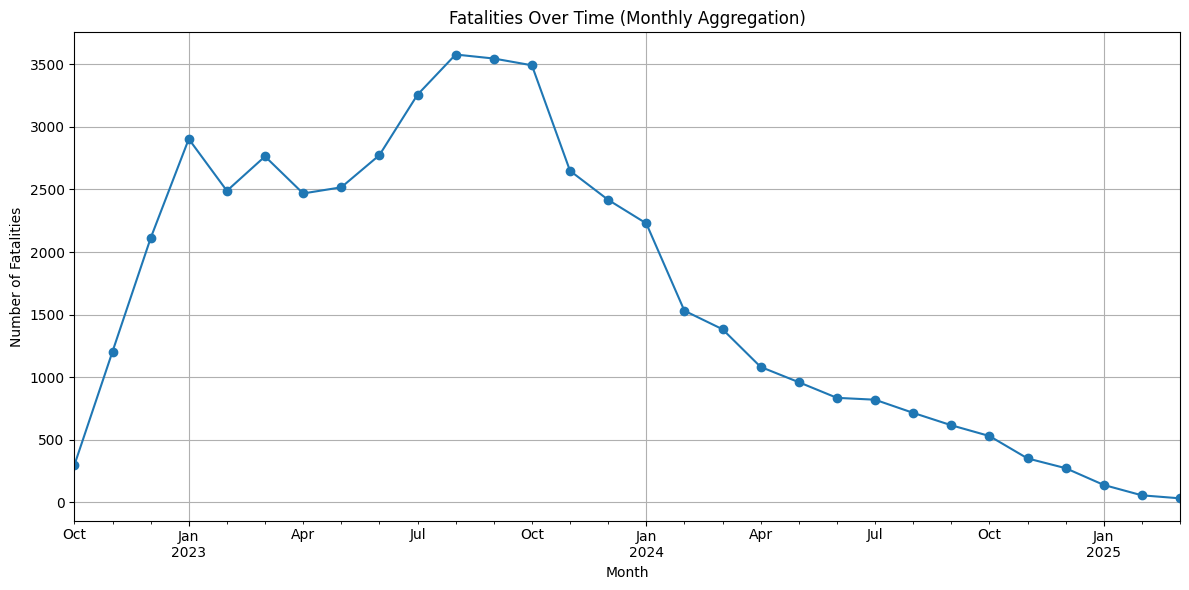

In [99]:
# Convert date_of_death to datetime if not already
df['date_of_death'] = pd.to_datetime(df['date_of_death'], errors='coerce')

# Filter out rows where date_of_death is NaT
df_time = df.dropna(subset=['date_of_death'])

# Set the date as index for resampling
df_time = df_time.set_index('date_of_death')

# Group fatalities by month
fatalities_by_month = df_time.resample('ME').size()

# Plot
plt.figure(figsize=(12, 6))
fatalities_by_month.plot(marker='o', linestyle='-')
plt.title('Fatalities Over Time (Monthly Aggregation)')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.tight_layout()
plt.show()

# Key Insights
1. A large portion of fatalities fall within the Adult and Child categories.

2. There is a visible gender imbalance in the fatalities, with one gender being affected more (details depend on plot).

3. Monthly trends show spikes and fluctuations in the number of deaths, possibly aligning with key events in the conflict.

# Conclusion
This analysis highlights the demographic breakdown and temporal trends of civilian fatalities in Gaza. It reveals the disproportionate impact on certain age groups and genders, and showcases how fatalities vary over time—information that could be crucial for humanitarian efforts and policy planning.